# Gradient Boosting Machine in Python


In [1]:
# import libraries
import sklearn
print(sklearn.__version__)

1.0.1


## Gradient Boosting Classification

In [2]:
# import libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

#define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

#define the model
model = GradientBoostingClassifier()

#define the model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

#evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

#report the results
print(f"Mean Accuracy: {np.mean(n_scores):.3f} ({np.std(n_scores):.3f})")


Mean Accuracy: 0.900 (0.023)


In [ ]:
# make predictions using gradient boosting for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719, 0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799, 3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


## Gradient Boosting Regression

In [ ]:
#evaluate gradient boosting for regression
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

#regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=42)

# model
model =  GradientBoostingRegressor()

#evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

#model performace
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

#report results
print(f"MAE: {np.mean(n_scores):.3f} ({np.std(n_scores):.3f})")


MAE: -73.848 (5.747)


In [ ]:
# gradient boosting ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = GradientBoostingRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.20543991, -0.97049844, -0.81403429, -0.23842689, -0.60704084, -0.48541492, 0.53113006, 2.01834338, -0.90745243, -1.85859731, -1.02334791, -0.6877744, 0.60984819, -0.70630121, -1.29161497, 1.32385441, 1.42150747, 1.26567231, 2.56569098, -0.11154792]
yhat = model.predict([row])
# summarize prediction
print('Prediction: %d' % yhat[0])

Prediction: 37


## GB Hyperparameters

### Effect of number of trees on classification

>10 0.807 (0.040)
>50 0.887 (0.026)
>100 0.901 (0.023)
>200 0.906 (0.026)
>500 0.911 (0.026)
>1000 0.913 (0.024)


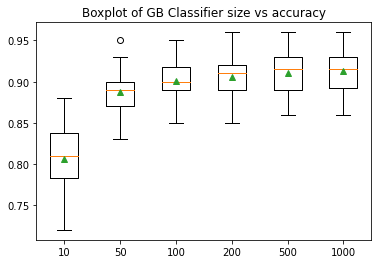

In [ ]:
#explore the effect of number of trees on the performance of GB classification model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

#define classification database
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
    return X, y

#get a list of model to evaluate
def get_models():
    models = dict()
    n_trees = [10, 50, 100, 200, 500, 1000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models
        
#evaluate a model with cross validation
def evaluate_model(model, X, y):
    #define validation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    #evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

#get data
X, y = get_dataset()

#get models to evaluate
models = get_models()

#evaluate models
results = list()
names = list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    #summarize results
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title("Boxplot of GB Classifier size vs accuracy")
pyplot.show()


### Effect of learning rate

>0.0001 0.684 (0.046)
>0.0010 0.763 (0.037)
>0.0100 0.814 (0.037)
>0.1000 0.899 (0.024)
>1.0000 0.896 (0.030)


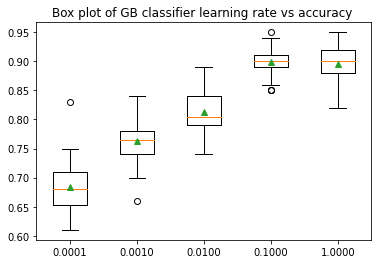

In [ ]:
#explore the effect of learning rate on the performance of GB classification model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

#define classification database
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
    return X, y

#get a list of model to evaluate
def get_models():
    models = dict()
    for lr in [0.0001, 0.0010, 0.0100, 0.1000, 1.0000]:
        key = "%.4f" % lr
        models[key] = GradientBoostingClassifier(learning_rate=lr)
    return models
        
#evaluate a model with cross validation
def evaluate_model(model, X, y):
    #define validation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    #evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

#get data
X, y = get_dataset()

#get models to evaluate
models = get_models()

#evaluate models
results = list()
names = list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    #summarize results
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title("Box plot of GB classifier learning rate vs accuracy ")
pyplot.show()


### Effect of tree depth

>1 0.802 (0.032)
>2 0.876 (0.029)
>3 0.899 (0.024)
>4 0.904 (0.025)
>5 0.907 (0.024)
>6 0.906 (0.028)
>7 0.891 (0.032)
>8 0.864 (0.039)
>9 0.821 (0.039)
>10 0.800 (0.036)


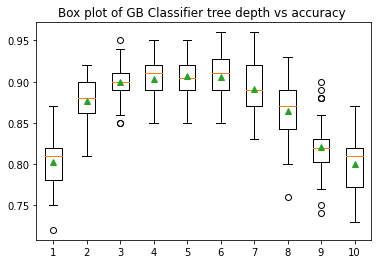

In [ ]:
#explore the effect of tree depth on the performance of GB classification model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

#define classification database
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
    return X, y

#get a list of model to evaluate
def get_models():
    models = dict()
    for d in range(1, 11):
        models[str(d)] = GradientBoostingClassifier(max_depth=d)
    return models
        
#evaluate a model with cross validation
def evaluate_model(model, X, y):
    #define validation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    #evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

#get data
X, y = get_dataset()

#get models to evaluate
models = get_models()

#evaluate models
results = list()
names = list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    #summarize results
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title("Box plot of GB Classifier tree depth vs accuracy ")
pyplot.show()


## Hyperparameter Tuning with GridSearch

In [ ]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

# define the model with default hyperparameters
model = GradientBoostingClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [50, 100, 500]
grid['learning_rate'] = [0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [5, 7, 9]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy', n_jobs=-1)

# execute the grid search
grid_result = grid_search.fit(X, y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Best: 0.944333 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.5}
0.877000 (0.030676) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.5}
0.869667 (0.032299) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7}
0.837000 (0.031321) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
0.887000 (0.026223) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
0.885000 (0.029069) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
0.857000 (0.031427) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
0.921667 (0.029674) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}
0.915667 (0.028365) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.7}
0.898667 (0.036215) with: {'learning_rate': 0.01, 'max_depth': 5